# In this notebook you will learn about the storage units in grid2op

Try me out interactively with: [![Binder](./img/badge_logo.svg)](https://mybinder.org/v2/gh/rte-france/Grid2Op/master)

**Objectives**

Another kind of continuous actions that are modeled in grid2op are the action on storage units. The aim of this notebook is to describe this kind of action, how it works, what it does, and how you can apply them.

## I) Storage units

First, in order to do action on storage units, storage units must be present on the grid. This is not the case for most grid2op environment. So you might want to check if there are storage units, as shown bellow:

In [5]:
import os
import sys
import grid2op
from tqdm.notebook import tqdm  # for easy progress bar
display_tqdm = False  # this is set to False for ease with the unitt test, feel free to set it to True
import numpy as np
import matplotlib.pyplot as plt

env_name1 = "l2rpn_case14_sandbox"
env_nok = grid2op.make(env_name1, test=True)
print(f"Can I use action on storage on environment \"{env_name1}\": {env_nok.n_storage > 0}")

env_name2 = "educ_case14_storage"
env = grid2op.make(env_name2, test=True)
print(f"Can I use action on storage on environment \"{env_name2}\": {env.n_storage > 0}")

/home/benjamin/Documents/grid2op_dev/getting_started/grid2op/MakeEnv/Make.py:305: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


Can I use action on storage on environment "l2rpn_case14_sandbox": False


/home/benjamin/Documents/grid2op_dev/getting_started/grid2op/MakeEnv/Make.py:305: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


Can I use action on storage on environment "educ_case14_storage": True


## II) What are storage units ?

Storage units are "elements" of a grid that can behave sometimes as generators, sometimes as load (depending on what they are told to do). They can basically store a certain quantity of energy and release it when aked.

The two main types of storage units we can think of are:

- "pumped storage": they store electric power by pumping it in an upward reservoir and can produce it again by letting the water through a turbine when going downhill (see this [wikipedia article](https://en.wikipedia.org/wiki/Pumped-storage_hydroelectricity) for more information)
- "batteries": they store energy in a chemical form and can be charge / discharge, quit like the battery of a cellphone, but in (way, way) bigger.

In grid2op a storage unit is defined by different parameters:
- `storage_Emax`: the maximum energy (expressed in MWh) the storage unit can contain. 

In [7]:
env.storage_Emax

array([15.,  7.], dtype=float32)

In [12]:
from grid2op.Parameters import Parameters
param = Parameters()
param.NO_OVERFLOW_DISCONNECTION = True
env = grid2op.make("l2rpn_case14_sandbox", param=param)

In [13]:
nb_step = 288 * 7
gens_p = np.zeros((nb_step, env.n_gen))
times = []
for i in range(nb_step):
    obs, *_ = env.step(env.action_space())
    gens_p[i,:] = obs.gen_p
    times.append(obs.get_time_stamp())

In [14]:
env.gen_type

array(['nuclear', 'thermal', 'wind', 'solar', 'solar', 'hydro'],
      dtype='<U10')

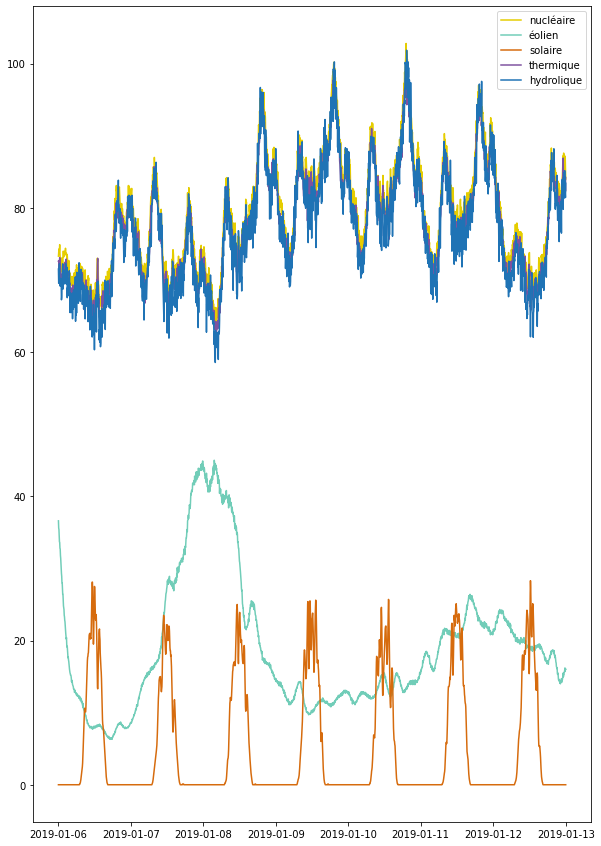

In [22]:
import matplotlib.pyplot as plt
from grid2op.PlotGrid import NUKE_COLOR, THERMAL_COLOR, WIND_COLOR, SOLAR_COLOR, HYDRO_COLOR

plt.figure(figsize=(10, 15))
plt.plot(times, gens_p[:,0], label="nucléaire", color=NUKE_COLOR)
plt.plot(times, gens_p[:,2], label="éolien", color=WIND_COLOR)
plt.plot(times, gens_p[:,3], label="solaire", color=SOLAR_COLOR)
plt.plot(times, gens_p[:,1], label="thermique", color=THERMAL_COLOR)
plt.plot(times, gens_p[:,-1], label="hydrolique", color=HYDRO_COLOR)
plt.legend()